In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('drive/My Drive/Colab Notebooks/ML workshop/Digit Recognition')
cwd=os.getcwd()
print(cwd)

/content/drive/My Drive/Colab Notebooks/ML workshop/Digit Recognition


In [0]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from utils import *
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

%load_ext autoreload
%autoreload 2


#Load the dataset

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


The label is 2


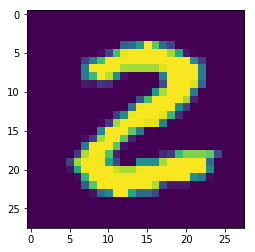

The label is 2


In [5]:
index=25
print('The label is '+ str(y_train[index]))
img=x_train[index]
plt.imshow(img)
plt.show()
print('The label is '+ str(y_train[index]))
#img.shape

In [0]:
x_train=x_train.reshape(-1,784)                                                    
x_test=x_test.reshape(-1,784)

In [0]:
def create_placeholder(n,n_y):
  X=tf.placeholder(tf.float32,shape=(None,n),name='X')
  Y=tf.placeholder(tf.float32,shape=(None,n_y),name='Y')
  return X,Y

##Normalizing

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

##Converting to one hot encoding

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

Using TensorFlow backend.


(60000, 10)

In [10]:
x_train.shape

(60000, 784)

In [0]:
learning_rate = 0.01
batch_size = 128
n_epochs = 25


In [0]:
def initialize_parameters():
  
  W=tf.get_variable("W",[784,10],initializer=tf.contrib.layers.xavier_initializer())
  b=tf.get_variable("b",[1,10],initializer=tf.contrib.layers.xavier_initializer())
  parameters={'W':W,
             'b':b}
  return parameters

In [0]:
def forward_propagate(X,parameters):
  W=parameters['W']
  b=parameters['b']
  logits = tf.matmul(X, W) + b
  return logits

In [0]:
def compute_cost(Z,Y):
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z,labels=Y))
  return cost

In [0]:
def model(x_train,y_train,x_test,y_test):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
                                           # to keep results consistent (numpy seed)
    (m, n) = x_train.shape             
    n_y = y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholder(n,n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z = forward_propagate(X,parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z,Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
    minibatch_size=512
    iterations=0
    saver = tf.train.Saver()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        #saver.restore(sess, "parameters/parameters1.ckpt")

        # Do the training loop
        for epoch in range(10):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            print(num_minibatches)
            minibatches = random_mini_batches(x_train, y_train, minibatch_size)
            
            t_minibatches= random_mini_batches(x_test, y_test, minibatch_size)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost =sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                ### END CODE HERE ###
                iterations +=1
                #minibatch_cost += temp_cost / num_minibatches
                
                

                    # Print the cost every epoch
                if  iterations % 5 == 0:
                  print ("Cost after epoch %i: %f" % (iterations, temp_cost))
                if  iterations % 1 == 0:
                  costs.append(temp_cost)
         # Calculate the correct predictions
        predict_op = tf.argmax(Z, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        for minibatch in minibatches:
          (minibatch_X, minibatch_Y) = minibatch
          train_accuracy = accuracy.eval({X:minibatch_X,Y:minibatch_Y}) 
          print("Train Accuracy:", train_accuracy)
        for minibatch in t_minibatches:
          (minibatch_X, minibatch_Y) = minibatch
          test_accuracy = accuracy.eval({X:minibatch_X,Y:minibatch_Y})
          print("Test Accuracy:", test_accuracy)
              
              
        #saver.save(sess, checkpoint_name)
        saver.save(sess, "ML workshop/parameters_new.ckpt")
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        #plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: x_train, Y: y_train})
        test_accuracy = accuracy.eval({X: x_test, Y: y_test})
       
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        #print(parameters)
        #saver.save(sess, "parameters1.ckpt")
                
    return train_accuracy, test_accuracy, parameters

W0807 07:51:53.101351 140562199635840 deprecation.py:323] From <ipython-input-14-e9761c89f6fb>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



117
Cost after epoch 5: 2.441343
Cost after epoch 10: 2.367728
Cost after epoch 15: 2.283952
Cost after epoch 20: 2.229168
Cost after epoch 25: 2.204540
Cost after epoch 30: 2.117539
Cost after epoch 35: 2.056803
Cost after epoch 40: 2.024612
Cost after epoch 45: 2.017560
Cost after epoch 50: 1.968795
Cost after epoch 55: 1.920502
Cost after epoch 60: 1.858217
Cost after epoch 65: 1.831238
Cost after epoch 70: 1.806505
Cost after epoch 75: 1.734176
Cost after epoch 80: 1.714710
Cost after epoch 85: 1.708224
Cost after epoch 90: 1.655095
Cost after epoch 95: 1.647156
Cost after epoch 100: 1.610047
Cost after epoch 105: 1.586366
Cost after epoch 110: 1.566884
Cost after epoch 115: 1.536475
117
Cost after epoch 120: 1.526078
Cost after epoch 125: 1.531385
Cost after epoch 130: 1.456376
Cost after epoch 135: 1.463843
Cost after epoch 140: 1.394132
Cost after epoch 145: 1.401504
Cost after epoch 150: 1.405800
Cost after epoch 155: 1.345998
Cost after epoch 160: 1.339286
Cost after epoch 165

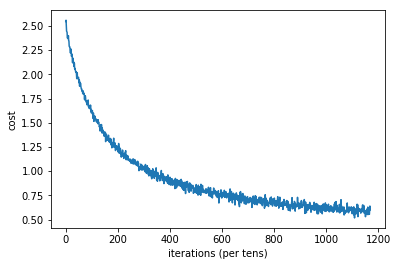

Tensor("Mean_2:0", shape=(), dtype=float32)
Train Accuracy: 0.85871667
Test Accuracy: 0.868


In [16]:
_, _, parameters = model(x_train, y_train, x_test, y_test)